# 画出数据一的点云图

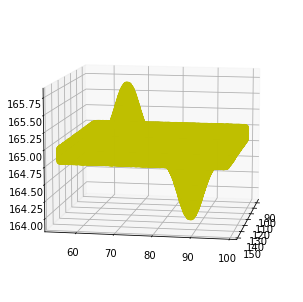

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('1.txt',header = None)
pointscloud=df.values
x1=pointscloud[:,0]
y1=pointscloud[:,1]
z1=pointscloud[:,2]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x1,y1,z1,c='y')
ax.view_init(10,10)

# 查看基本数据特征

In [2]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
0,880462.0,118.00,17.39,87.88,102.95,118.01,133.06,148.07
1,880462.0,76.78,12.64,54.91,65.85,76.79,87.73,98.67
2,880462.0,164.90,0.11,163.94,164.85,164.90,164.95,165.76


我们根据数据中砖块的特征，利用分位数，得到砖块的上下边界

In [3]:
store_min = df.quantile(q=0.02, axis=0, numeric_only=True, interpolation='linear')
print(store_min[2])
store_max = df.quantile(q=0.98, axis=0, numeric_only=True, interpolation='linear')
print(store_max[2])

164.67147320068145
165.02790383522694


我们去除砖块正常的部分，留下的便是有问题的部分

In [4]:
Df = df[~((df[2]>store_min[2])&(df[2]<store_max[2]))] 

画图验证我们的猜想

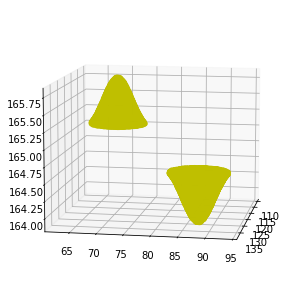

In [5]:
pointscloud=Df.values
x1=pointscloud[:,0]
y1=pointscloud[:,1]
z1=pointscloud[:,2]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x1,y1,z1,c='y')
ax.view_init(10,10)

这是砖块的厚度和这个数据集砖块上下边缘的距离，可见是不平整的

In [6]:
print(store_max[2]-store_min[2])
print(Df[2].max()-Df[2].min())

0.3564306345454895
1.8113986634374442


# 画出第二组数据的点云图

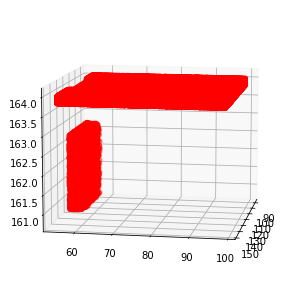

In [7]:
df2 = pd.read_csv('2.txt',header = None)
pointscloud=df2.values
x2=pointscloud[:,0]
y2=pointscloud[:,1]
z2=pointscloud[:,2]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x2,y2,z2,c='r')
ax.view_init(10,10)

下面是砖块的厚度

In [8]:
std=store_max[2]-store_min[2]
print(std)

0.3564306345454895


去除正常部分

In [9]:
Df = df2[~((df2[2]>df2[2].max()-std)&(df2[2]<df2[2].max()))] 

画出点云图查看，是缺边的情况

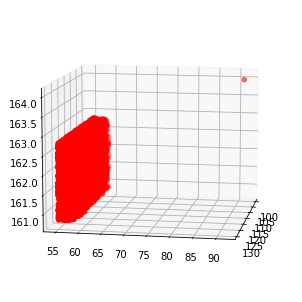

In [10]:
pointscloud=Df.values
x2=pointscloud[:,0]
y2=pointscloud[:,1]
z2=pointscloud[:,2]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x2,y2,z2,c='r')
ax.view_init(10,10)

# 画出点云图

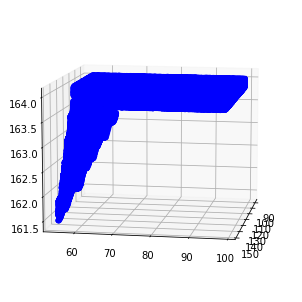

In [11]:
df3 = pd.read_csv('3.txt',header = None)
pointscloud=df3.values
x3=pointscloud[:,0]
y3=pointscloud[:,1]
z3=pointscloud[:,2]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x3,y3,z3,c='b')
ax.view_init(10,10)

去除正常部分，保留特殊部分并画图

In [12]:
Df = df3[~((df3[2]>df3[2].max()-std)&(df3[2]<df3[2].max()))] 

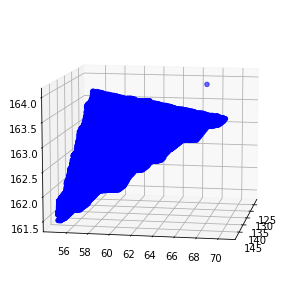

In [13]:
pointscloud=Df.values
x2=pointscloud[:,0]
y2=pointscloud[:,1]
z2=pointscloud[:,2]
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(x2,y2,z2,c='b')
ax.view_init(10,10)